# Simulation of Options Prices

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import default_rng

In [8]:
rng = default_rng(2745465)

## 1. Brownian Motion

Generate a sequence of n $Y_i$'s with mean 0, variance 1

Can construct GBM as follows:

$W(\frac{i}{n})=W(\frac{i-1}{n}) + \frac{Y_i}{\sqrt{n}}$

In [75]:
m = 100 # Number of replications
n = 100 # Number of RVs Y generated for each process
Y = np.random.normal(size=(m,n))
W = np.zeros((m,n)) 

# (Keep W(0) <- 0)

for i in range(m):
    for j in range(1,n):
        W[i,j] = W[i,j-1] + Y[i,j]/(n**0.5)
        

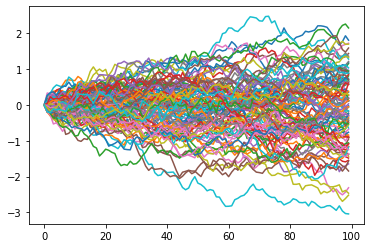

<Figure size 432x288 with 0 Axes>

In [90]:
plt.plot(W.T)
plt.show()
plt.clf()

## Geometric Brownian Motion

Geometric Brownian motion can be defined as the following continuous stochastic process:

$ S(t) = S(0)\exp\{(\mu-\frac{\sigma^2}{2} + \sigma W(t)\} $

In [171]:
#Set mu = 1.0
#Set simga = 1
# S[0] is the initial price

In [178]:
### Set simulation constants and initialize m*n array
START_PRICE = 100
mu = 0.1
sigma2 = 1
S = np.zeros((m,n))
S[:,0] = START_PRICE


for i in range(m):
    for j in range(1,n):
        S[i,j] = START_PRICE*(np.exp((mu-sigma2/2)*j/n +
                     sigma2**0.5*W[i,j] ))

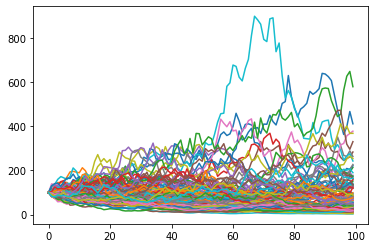

In [184]:
plt.clf()
plt.plot(S.T)
plt.show()

Can try varying mu and sigma2 and compare

# European Call

We can calculate the values of a call as follows:

$Price = e^{-rT} E[(S(T)-k]^+$ 

First lets calculate the $E[S(T)]$ by averaging over the last column of all the brownian motion runs above

In [258]:
r = mu
T = 1
k = 130 # Strike price

Calculate the payout vector for all of the runs above

In [259]:
payout = S[:,-1]-k
payout.shape

payout = np.array((payout,np.zeros(n)))
payout = payout.max(axis=0)

The expected payout is the mean of all the payouts

In [260]:
exp_payout = np.mean(payout)
exp_payout

25.893810860588882

Value of the **130 Strike European Call 100 days** with underlying stock price of **$100**, 100 days out from expiration 

(with a risk free rate of 0.1 and variance of 1)

The calculate the price using: 
$Price = e^{-rT} E[(S(T)-k]^+$ 

In [261]:
European_Call = np.exp(-r*T)*exp_payout
European_Call

23.429688962206733

## European Put

In [249]:
payout = k-S[:,-1]
payout.shape

payout = np.array((payout,np.zeros(n)))
payout = payout.max(axis=0)

Once again, the expected payout is the mean of all the payouts

In [250]:
exp_payout = np.mean(payout)
exp_payout

58.48890437598153

Value of the european `$130` put 100 days out from expiration with underlying at `$100`.

Note that we expect it to be much more valuable that the call as its **in the money (ITM) put** but **out-of-the money (OTM) call*

In [251]:
European_Put = np.exp(-r*T)*exp_payout
European_Put

52.92294921931526